In [2]:
import pandas as pd
df_listings=pd.read_csv('df_listings.csv')

In [3]:
## Select data of properties within 10km from Victoria Art Museum
from folium.plugins import FastMarkerCluster

In [5]:
# draw maps
lats2018 = df_listings['latitude'].tolist()
lons2018 = df_listings['longitude'].tolist()
locations = list(zip(lats2018, lons2018))
import folium as fo
map1 = fo.Map(location=[-37.82,144.96], zoom_start=11.5)
FastMarkerCluster(data=locations).add_to(map1)
map1

#经纬度 · 37°49′21″S 144°58′07″E﻿ / ﻿37.822595°S 144.968634°E﻿ / -37.822595; 144.968634 ; 


In [20]:
# draw maps 5km
destination = [-37.82, 144.96] #latitude, longitude
lats = df_listings['latitude'].tolist()
lons = df_listings['longitude'].tolist()
locations = list(zip(lats, lons))
import folium
map1 = folium.Map(location=destination, zoom_start=11.5)
folium.Circle(radius=5000,location=destination, color="black", fill=False).add_to(map1)
FastMarkerCluster(data=locations).add_to(map1)
map1

In [12]:
import numpy as np
from math import *

In [25]:
# calculate distance
#a=np.sin(float(df_listings['latitude']))
df_listings['distance']=28*6371*np.arcsin(np.sqrt(np.sin((df_listings['latitude']+37.82)/2)**2+np.cos('latitude')*np.cos('latitude')*(np.sin((df_listings['longitude']-144.96)/2)**2)))

TypeError: ufunc 'cos' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [27]:
from haversine import haversine, Unit

In [28]:
# 两点的经纬度
point1 = (-37.82, 144.96)
point2 = (df_listings['latitude'], df_listings['longitude'])
df['distance'] = haversine(point1, point2, unit=Unit.KILOMETERS)    # km
#result2 = haversine(point1, point2, unit=Unit.METERS)        # m

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [19]:
df_listings['longitude'].dtype

dtype('float64')

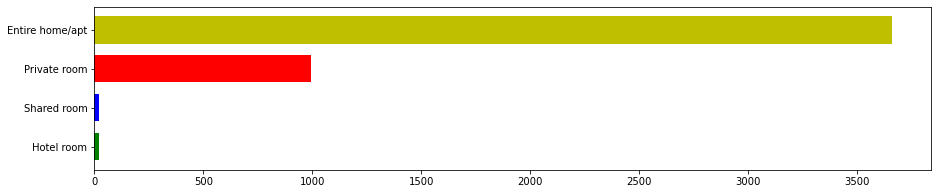

<ipython-input-39-7ef255b4415b>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  rank_data = df.groupby(['host_name'])['profit_per_month','reviews_per_month'].apply(sum)


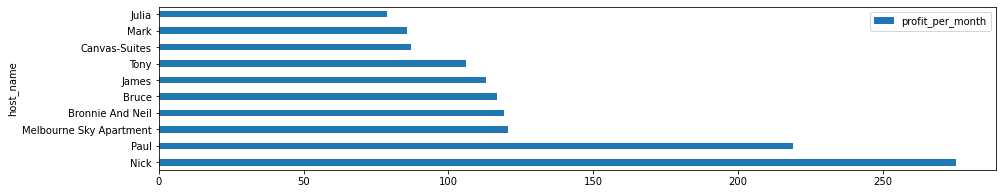

In [39]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

from config import *


freq = df['room_type']. value_counts().sort_values(ascending=True)
freq.plot.barh(figsize=(15, 3), width=0.7, color = ["g","b","r","y"])
plt.show()

# top host
rank_data = df.groupby(['host_name'])['profit_per_month','reviews_per_month'].apply(sum)
rank_data = rank_data.sort_values('profit_per_month', ascending=False)
rank_data.iloc[:10,:1].plot.barh(figsize=(15, 3), width=0.4)
plt.show()

<ipython-input-40-721a88b3f91d>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  rank_data = df.groupby(['host_name'])['profit_per_month','reviews_per_month'].apply(sum)


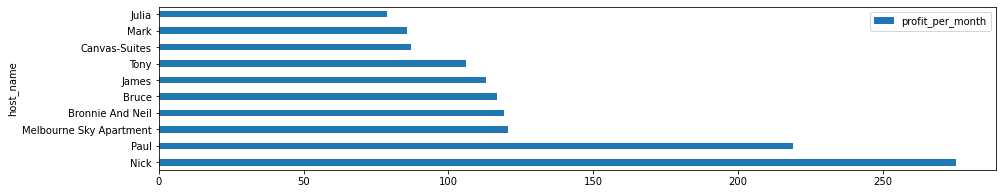

In [40]:
# top host
rank_data = df.groupby(['host_name'])['profit_per_month','reviews_per_month'].apply(sum)
rank_data = rank_data.sort_values('profit_per_month', ascending=False)
rank_data.iloc[:10,:1].plot.barh(figsize=(15, 3), width=0.4)
plt.show()

In [41]:
rank_data.head()

,profit_per_month,reviews_per_month
host_name,,
Nick,275.301463,14.46
Paul,219.178593,222.50
Melbourne Sky Apartment,120.555901,78.48
Bronnie And Neil,119.077783,35.12
Bruce,116.924192,58.46


In [42]:
df['host_name'].value_counts()

Paul                                  85
Bruce                                 66
Beyond A Room                         62
Valeria                               62
Boutique Stays Accommodation Group    51
                                      ..
Esther                                 1
Zbd                                    1
Sophia And Guillaume                   1
Gabrielle                              1
Helena                                 1
Name: host_name, Length: 1450, dtype: int64

In [43]:
df[['host_name']=='Nick'].head()

KeyError: False

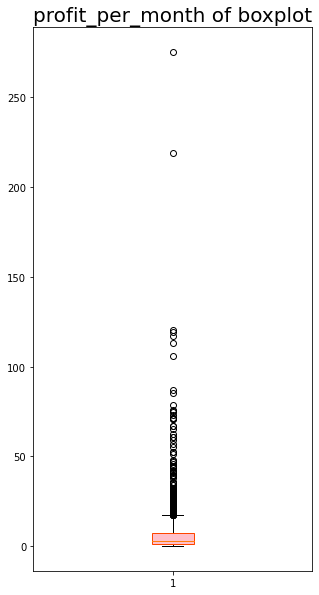

In [44]:
#
box = rank_data['profit_per_month']

plt.figure(figsize=(5,10))#设置画布的尺寸
plt.title('profit_per_month of boxplot',fontsize=20)#标题，并设定字号大小

#boxprops：color箱体边框色，facecolor箱体填充色；
plt.boxplot([box],patch_artist = True, boxprops = {'color':'orangered','facecolor':'pink'})

plt.show()#显示图像


In [45]:
df['profit_per_month'].value_counts().describe()

count    4476.000000
mean        1.049598
std         0.267824
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         5.000000
Name: profit_per_month, dtype: float64

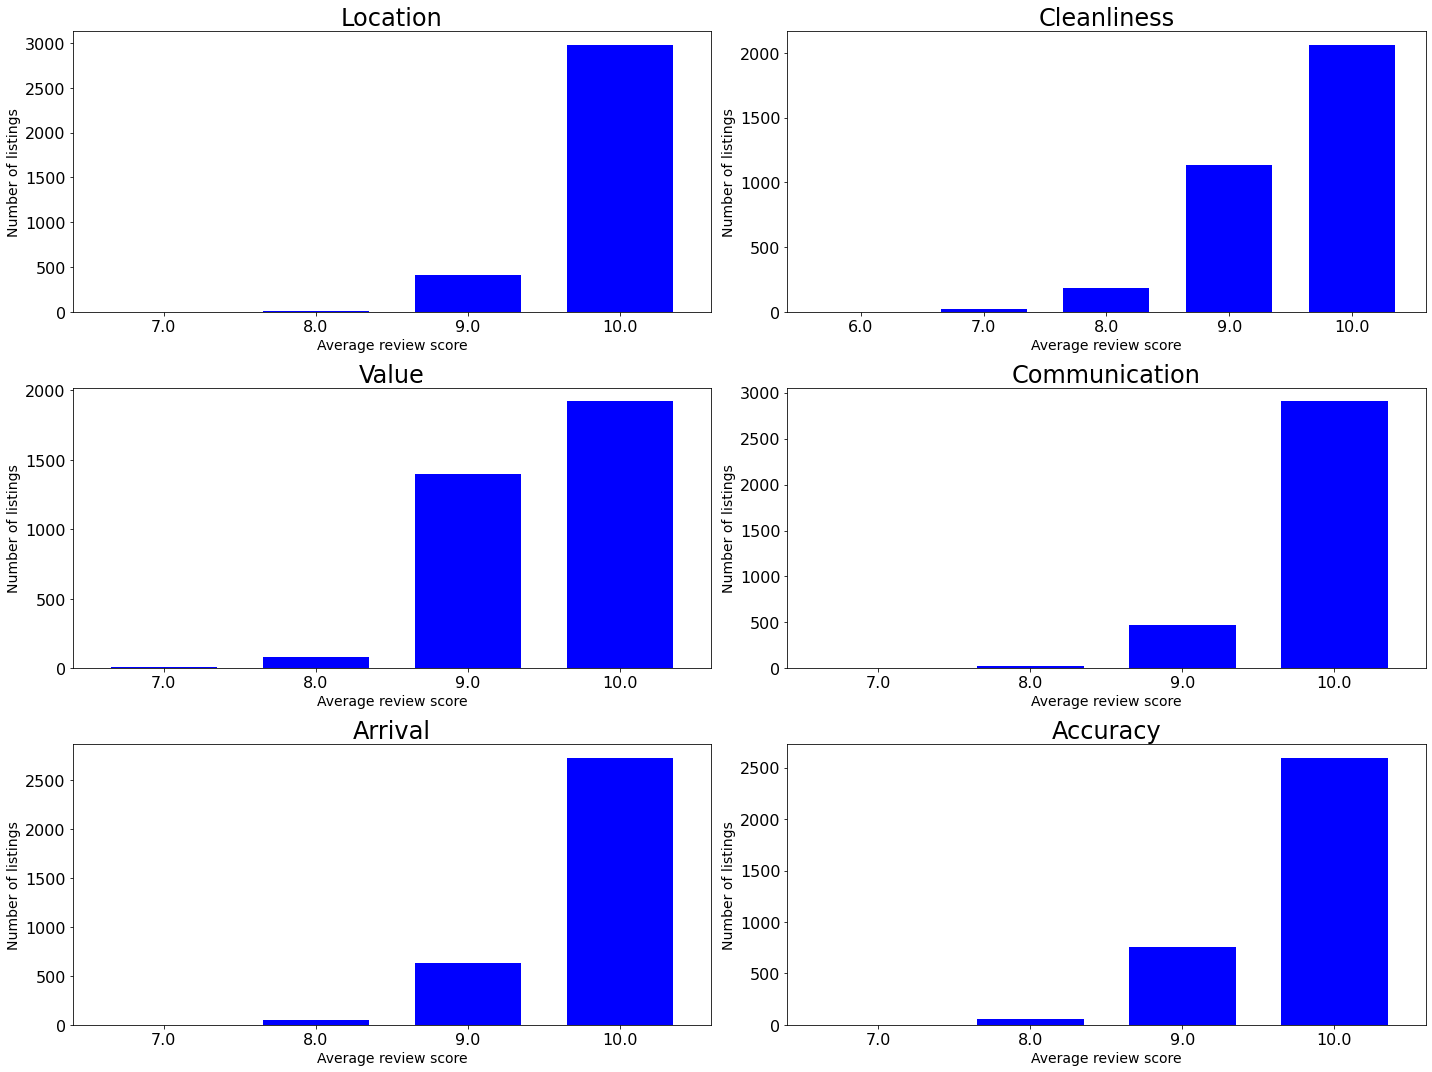

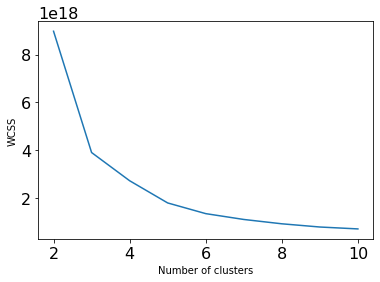

[0 0 5 ... 2 5 0]


In [46]:
# ------------ 分析 ------------
#
# -*- coding: utf-8 -*- 
# @Time : 2022/12/17 12:08 
# @Author : YeMeng 
# @File : demo2.py 
# @contact: 876720687@qq.com


# review 一系列都是得分能够直接获得消费者对这家店的评价
review_score = df[df['number_of_reviews']>=10]

fig = plt.figure(figsize=(20,15))
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)

ax1 = fig.add_subplot(321)
feq=review_score['review_scores_location'].value_counts().sort_index()
ax1=feq.plot.bar(color='b', width=0.7, rot=0)
#ax1.tick_params(axis = 'both', labelsize = 16)
plt.title("Location", fontsize=24)
plt.ylabel('Number of listings', fontsize=14)
plt.xlabel('Average review score', fontsize=14)

ax2 = fig.add_subplot(322)
feq=review_score['review_scores_cleanliness'].value_counts().sort_index()
ax2=feq.plot.bar(color='b', width=0.7, rot=0)
plt.title("Cleanliness", fontsize=24)
plt.ylabel('Number of listings', fontsize=14)
plt.xlabel('Average review score', fontsize=14)

ax3 = fig.add_subplot(323)
feq=review_score['review_scores_value'].value_counts().sort_index()
ax3=feq.plot.bar(color='b', width=0.7, rot=0)
plt.title("Value", fontsize=24)
plt.ylabel('Number of listings', fontsize=14)
plt.xlabel('Average review score', fontsize=14)

ax4 = fig.add_subplot(324)
feq=review_score['review_scores_communication'].value_counts().sort_index()
ax4=feq.plot.bar(color='b', width=0.7, rot=0)
plt.title("Communication", fontsize=24)
plt.ylabel('Number of listings', fontsize=14)
plt.xlabel('Average review score', fontsize=14)

ax5 = fig.add_subplot(325)
feq=review_score['review_scores_checkin'].value_counts().sort_index()
ax5=feq.plot.bar(color='b', width=0.7, rot=0)
plt.title("Checkin", fontsize=24)
plt.ylabel('Number of listings', fontsize=14)
plt.xlabel('Average review score', fontsize=14)

ax6 = fig.add_subplot(326)
feq=review_score['review_scores_accuracy'].value_counts().sort_index()
ax6=feq.plot.bar(color='b', width=0.7, rot=0)
plt.title("Accuracy", fontsize=24)
plt.ylabel('Number of listings', fontsize=14)
plt.xlabel('Average review score', fontsize=14)

plt.tight_layout()
plt.show()


# ----- find the most hot one ---------


# nlp
# ['neighborhood_overview','host_about','host_verifications']



# ----- 聚类 --------
features1 = df.select_dtypes(exclude='object')
# 确定聚类数量
wcss = []

# Fit the model for a range of values for the number of clusters
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(features1)
    wcss.append(kmeans.inertia_)

# Plot the WCSS values
plt.plot(range(2, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


# 依据确定值进行类别选取
kmeans=KMeans(n_clusters=6,init='k-means++',n_init=10,max_iter=300,random_state=0)
y_pred=kmeans.fit_predict(features1)
print(y_pred)

# 聚类结果
cat_df_km=df.copy()
cat_df_km['km_result']=y_pred

In [47]:
cat_df_km['km_result'].value_counts()

0    2025
5    1061
2     597
1     414
4     346
3     255
Name: km_result, dtype: int64

In [48]:
cat_df_km[cat_df_km['km_result']==1]

,id,listing_url,scrape_id,name,description,neighborhood_overview,host_id,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price_$,profit_per_month,km_result
12385,31686718,https://www.airbnb.com/rooms/31686718,20200820034003,Riverside Penthouse on Victoria Harbour Sleeps-12,Welcome to our Penthouse Apartment with unmatc...,Our Docklands or as it is recently called Vic...,188799528,Will,2018-05-10,"Brisbane City, Queensland, Australia",Uni Student. Currently taking a gap year to fo...,75,0.7,0,7.0,"['email', 'phone', 'offline_government_id', 's...",1,1,Melbourne,-37.82146,144.94312,Entire apartment,Entire home/apt,12,2 baths,3.0,4.0,"[""Coffee maker"", ""Stove"", ""TV"", ""Free parking ...",$369.00,2,1125,1,4,1125,1125,2.1,1125.0,30,55,72,336,61,35,0,2019-02-12,2020-07-09,84.0,8.0,7.0,8.0,9.0,10.0,7.0,0,3,2,1,0,3.29,369.0,14.452500,1
7130,21257275,https://www.airbnb.com/rooms/21257275,20200820034003,"Top location. Walk to shops, river. Modern com...",Quaint cottage with modern bathrooms and kitch...,Warburton makes a great central base for your ...,153708880,Tracy,2017-10-08,"Surrey Hills, Victoria, Australia","As an Airbnb superhost, I have a strict never-...",100,1.0,1,1.0,"['email', 'phone', 'reviews', 'offline_governm...",1,1,Yarra Ranges,-37.75407,145.69779,Entire house,Entire home/apt,5,2 baths,2.0,2.0,"[""Coffee maker"", ""Stove"", ""TV"", ""Free parking ...",$267.00,2,14,2,4,1125,1125,2.3,1125.0,24,44,69,329,144,35,0,2017-10-15,2020-07-08,99.0,10.0,10.0,10.0,10.0,10.0,9.0,1,1,1,0,0,4.14,267.0,11.165455,1
8772,23491909,https://www.airbnb.com/rooms/23491909,20200820034003,Amazing 3 Bdr Apt- Melbourne opposite Crown & ...,Centrally located in Melbourne<br /><br />Melb...,Directly opposite the Crown Casino complex whi...,151299817,Geoff,2017-09-19,"Templestowe, Victoria, Australia",We love travelling - we are also Airbnb hosts ...,100,1.0,1,2.0,"['email', 'phone', 'reviews', 'offline_governm...",1,1,Melbourne,-37.82626,144.95607,Entire apartment,Entire home/apt,6,2 baths,3.0,3.0,"[""Stove"", ""TV"", ""Free parking on premises"", ""G...",$275.00,2,1125,2,4,1125,1125,2.1,1125.0,18,43,66,330,119,36,0,2018-03-12,2020-03-15,99.0,10.0,10.0,10.0,10.0,10.0,10.0,0,2,2,0,0,4.00,275.0,11.111111,1
15254,38078407,https://www.airbnb.com/rooms/38078407,20200820034003,"Stylish 2 Br 2 Bath at Southern Cross, free tram",Large space for more than 7 people. Live like ...,One of the most popular and famous area of Mel...,140649405,Michael,2017-07-15,Australia,I'm a friendly host who lives in Australia. I ...,100,1.0,0,5.0,"['email', 'phone', 'jumio', 'offline_governmen...",1,1,Melbourne,-37.81398,144.95537,Entire condominium,Entire home/apt,7,2 baths,2.0,5.0,"[""Coffee maker"", ""Stove"", ""TV"", ""Lake access"",...",$157.00,1,1125,1,4,1125,1125,1.2,1125.0,0,0,0,0,81,81,0,2019-08-29,2020-07-03,97.0,10.0,9.0,10.0,10.0,10.0,10.0,0,5,5,0,0,6.79,157.0,10.990000,1
11406,29950854,https://www.airbnb.com/rooms/29950854,20200820034003,Fresh Start Point Cook,Lovely house at the heart of Saltwater in Poin...,The club house with gy

In [49]:
df.head()

,id,listing_url,scrape_id,name,description,neighborhood_overview,host_id,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price_$,profit_per_month
6406,19751625,https://www.airbnb.com/rooms/19751625,20200820034003,Cosy Apt with luxury Tempur bed on Lygon St,This charming apartment located on Lygon St in...,"Located on Lygon St in Carlton, you are 400m a...",13801169,Nick,2014-04-02,"Carlton, Victoria, Australia",I promise I won't be your stereotypical vegeta...,100,1.0,1,3.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",1,1,Melbourne,-37.79345,144.96682,Private room in apartment,Private room,2,1.5 shared baths,1.0,1.0,"[""Coffee maker"", ""Stove"", ""TV"", ""Free parking ...","$7,500.00",2,90,2,4,90,90,2.1,90.0,30,60,90,91,114,22,0,2017-10-27,2020-02-05,97.0,10.0,9.0,10.0,10.0,10.0,10.0,0,3,0,3,0,3.32,7500.0,256.701031
11054,29228505,https://www.airbnb.com/rooms/29228505,20200820034003,Be on Cloud9 - Melb Central Lux 3BR Apt,Cloud 9 living in Melbourne Central with breat...,Everything is nearby. Supermarkets (Asian & Lo...,4924814,Akbar,2013-02-01,"Victoria, Australia",Melbourne has been a home for me for more then...,100,1.0,0,7.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",1,1,Melbourne,-37.80877,144.95935,Entire apartment,Entire home/apt,8,2 baths,3.0,4.0,"[""Stove"", ""TV"", ""Single level home"", ""Gym"", ""A...","$2,290.00",6,1125,6,600,1125,1125,587.7,1125.0,30,60,90,90,39,16,0,2018-11-04,2020-03-17,96.0,10.0,10.0,9.0,10.0,10.0,10.0,0,6,6,0,0,1.78,2290.0,42.460417
7324,21516657,https://www.airbnb.com/rooms/21516657,20200820034003,Monash University,"Close to Monash Uni<br /><br />Desk, chair are...",Available free street parking before 9am and a...,52745704,Vickey,2015-12-30,"Clayton, Victoria, Australia",Please be noted that we have left Australia,25,0.0,0,3.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",1,1,Monash,-37.92045,145.12757,Private room in house,Private room,1,1 shared bath,1.0,1.0,"[""Hangers"", ""Essentials"", ""Washer"", ""Free park...","$3,228.00",1,1125,1,4,1125,1125,1.2,1125.0,30,60,90,90,32,0,0,2017-11-09,2019-05-25,89.0,9.0,9.0,10.0,9.0,10.0,9.0,0,1,0,1,0,0.94,3228.0,34.093483
17491,40828457,https://www.airbnb.com/rooms/40828457,20200820034003,1 Bedroom Apt - Next to The Glen Mall,RECENTLY OPENED - SPECIAL RATES - 1 minute fro...,Our apartments are situated in the suburb of G...,314668017,Billy @ Domi Serviced Apartments,2019-12-05,"Glen Waverley, Victoria, Australia",Hi my name is Billy and we cannot wait to welc...,100,1.0,1,4.0,"['email', 'phone', 'jumio', 'offline_governmen...",1,1,Monash,-37.87922,145.16482,Entire serviced apartment,Entire home/apt,2,1 bath,1.0,1.0,"[""Coffee maker"", ""Stove"", ""TV"", ""Building staf...",$129.00,1,1125,1,4,999,1125,1.2,1001.0,29,59,89,364,195,195,11,2019-12-17,2020-08-08,96.0,10.0,10.0,10.0,10.0,10.0,9.0,0,4,4,0,0,23.49,129.0,31.564687
17730,41088166,https://www.airbnb.com/rooms/41088166,20200820034003,2 Bedroom 2 Bathroom - Next to The Glen Mall,2 BEDROOM/2 BATHROOM - APARTMENTS OPENING - 2...,Our apartments are si

In [50]:
df['host_location'].value_counts().head(10)

Melbourne, Victoria, Australia         1800
Victoria, Australia                     718
AU                                      292
Australia                               112
Healesville, Victoria, Australia         46
Southbank, Victoria, Australia           44
South Yarra, Victoria, Australia         43
New South Wales, Australia               41
Saint Kilda, Victoria, Australia         40
West Melbourne, Victoria, Australia      40
Name: host_location, dtype: int64

In [51]:
# 每个host拥有的房源的数量的 均值、中位数、标准差、最大值、最小值
#df['host_name'].value_counts().describe().plot.barh()
df['host_name'].value_counts().describe()

count    1450.000000
mean        3.240000
std         5.646382
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max        85.000000
Name: host_name, dtype: float64

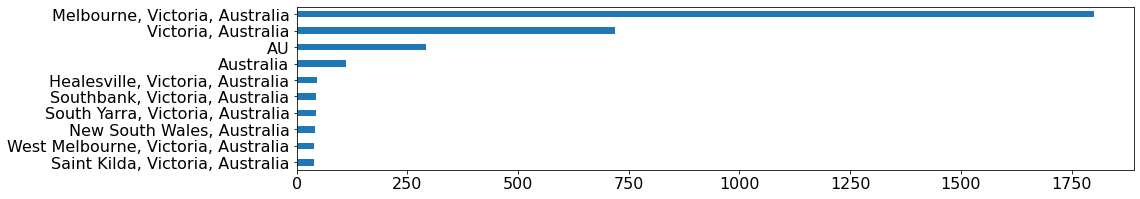

In [52]:
#top 10 hots_locations
#数据标签？？？？？
location_data = df['host_location'].value_counts().head(10)
location_data = location_data.sort_values()
rect=location_data.plot.barh(figsize=(15, 3), width=0.4)
x=location_data.index
y=location_data
plt.show()

In [53]:
print(location_data.index)

Index(['Saint Kilda, Victoria, Australia',
       'West Melbourne, Victoria, Australia', 'New South Wales, Australia',
       'South Yarra, Victoria, Australia', 'Southbank, Victoria, Australia',
       'Healesville, Victoria, Australia', 'Australia', 'AU',
       'Victoria, Australia', 'Melbourne, Victoria, Australia'],
      dtype='object')


In [54]:
print(location_data)

Saint Kilda, Victoria, Australia         40
West Melbourne, Victoria, Australia      40
New South Wales, Australia               41
South Yarra, Victoria, Australia         43
Southbank, Victoria, Australia           44
Healesville, Victoria, Australia         46
Australia                               112
AU                                      292
Victoria, Australia                     718
Melbourne, Victoria, Australia         1800
Name: host_location, dtype: int64


In [55]:
df['host_is_superhost']

6406     1
11054    0
7324     0
17491    1
17730    1
        ..
5663     0
5775     0
5917     0
5201     0
2599     0
Name: host_is_superhost, Length: 4698, dtype: int64

In [56]:
# relace 't' to '1', and 'f' to '0' in 'host_is_superhost'column
def format_price(price):
    return(float(price.replace('t','1').replace('f','0')))

df['host_is_superhost_0/1'] = df['host_is_superhost'].apply(format_price) 
df[['host_is_superhost','host_is_superhost_0/1']].head()

AttributeError: 'int' object has no attribute 'replace'

In [57]:
df[['host_is_superhost','host_has_profile_pic','host_identity_verified','instant_bookable']]

,host_is_superhost,host_has_profile_pic,host_identity_verified,instant_bookable
6406,1,1,1,0
11054,0,1,1,0
7324,0,1,1,0
17491,1,1,1,0
17730,1,1,1,1
...,...,...,...,...
5663,0,1,1,1
5775,0,1,1,1
5917,0,1,1,1
5201,0,1,1,0


In [58]:
df.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
name                                             object
description                                      object
neighborhood_overview                            object
host_id                                           int64
host_name                                        object
host_since                                       object
host_location                                    object
host_about                                       object
host_response_time                                int64
host_response_rate                              float64
host_is_superhost                                 int64
host_listings_count                             float64
host_verifications                               object
host_has_profile_pic                              int64
host_identity_verified                          

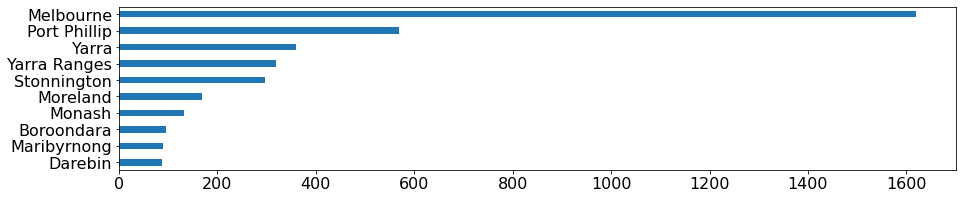

In [59]:
#top 10 neighbourhood_cleansed
#数据标签？？？？？
neighbourhood_cleansed_data = df['neighbourhood_cleansed'].value_counts().head(10)
neighbourhood_cleansed_data = neighbourhood_cleansed_data.sort_values()
neighbourhood_cleansed_data.plot.barh(figsize=(15, 3), width=0.4)
x=neighbourhood_cleansed_data.index
y=neighbourhood_cleansed_data
plt.show()

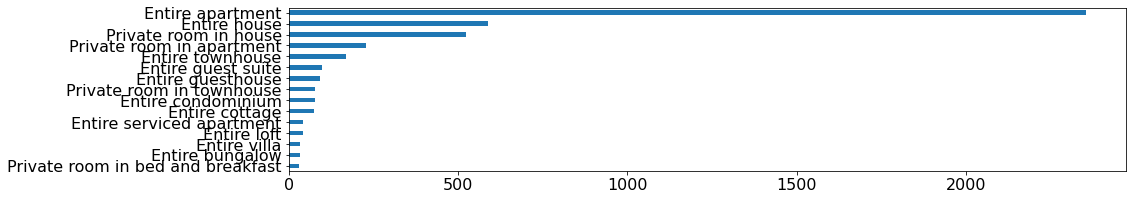

In [60]:
#top15 types of property
#数据标签？？？？？
property_type_data = df['property_type'].value_counts().head(15)
property_type_data = property_type_data.sort_values()
property_type_data.plot.barh(figsize=(15, 3), width=0.4)
x=property_type_data.index
y=property_type_data
plt.show()

In [61]:
# show top15 types of property
pd.set_option ('display.max_rows', 1000) 
pd.set_option ('display.max_columns', 1000)
df['property_type'].value_counts().head(15)

Entire apartment                     2353
Entire house                          587
Private room in house                 524
Private room in apartment             228
Entire townhouse                      170
Entire guest suite                     99
Entire guesthouse                      92
Private room in townhouse              79
Entire condominium                     78
Entire cottage                         76
Entire serviced apartment              43
Entire loft                            41
Entire villa                           33
Entire bungalow                        32
Private room in bed and breakfast      30
Name: property_type, dtype: int64

In [62]:
# show top15 types of property
pd.set_option ('display.max_rows', 1000) 
pd.set_option ('display.max_columns', 1000)
df['bathrooms_text'].value_counts()

1 bath               2383
2 baths               828
1 shared bath         407
1.5 baths             267
1 private bath        234
2.5 baths             156
1.5 shared baths      126
3 baths                70
2 shared baths         53
3.5 baths              43
2.5 shared baths       33
4 shared baths         18
4 baths                14
3 shared baths          9
0 shared baths          7
5.5 shared baths        6
Shared half-bath        6
5 baths                 6
4.5 baths               5
0 baths                 4
3.5 shared baths        4
Half-bath               3
7.5 baths               3
7 baths                 3
6 baths                 2
10 baths                2
6.5 baths               2
7 shared baths          1
Private half-bath       1
5 shared baths          1
8 baths                 1
Name: bathrooms_text, dtype: int64

In [63]:
df_reviews = pd.read_csv('reviews.csv')

In [64]:
df_reviews = df_reviews[~df_reviews['comments'].isna()]

In [65]:
#drop rows that 'listing_id' doesn't exist in the 'id' of 'listings' and create a new dataset'concat'
# merge dataset 'listings' and 'reviews' with the same 'id'
df_reviews.drop(columns=['id'],inplace=True)
df_reviews = df_reviews.rename(columns={'listing_id': 'id'})
df_concat = pd.merge(df,df_reviews,how="inner",on='id')

In [66]:
df_concat.to_csv("df_concat.csv")

In [67]:
df_concat.shape

(249632, 65)

In [68]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
scorer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/kukudexinxin/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [69]:
def calculate_sentiment(comment):
    return(scorer.polarity_scores(comment)['compound'])

df_concat.loc[:,'sentiment'] = df_concat['comments'].apply(calculate_sentiment)
df_concat[['comments','sentiment']].head(10)

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
scorer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/kukudexinxin/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [70]:
#calculate sentiments of reviews
#因为有一些列是中文，所以说分数会是零分，我们要找到这些零分的行,然后将它删去
def calculate_sentiment(comment):
    return(scorer.polarity_scores(comment)['compound'])

df_concat.loc[:,'sentiment'] = df_concat['comments'].apply(calculate_sentiment)
df_concat[['comments','sentiment']].head()

,comments,sentiment
0,"That is the lovely house with the nice host, N...",0.9617
1,Very nice clean and cozy apartment. The host w...,0.8824
2,Very friendly and generous host :),0.8766
3,"给了我们很多帮助和推荐,so nice｡帮我们准备了很多东西,还问我们需不需要电扇之类,住的...",0.0000
4,Had a lovely weekend stay here with my girlfri...,0.9402


In [71]:
#delete rows of sentiment=0, means words in Chinese
df_concat=df_concat[df_concat['sentiment']!=0]

In [72]:
df_concat.shape

(237555, 66)

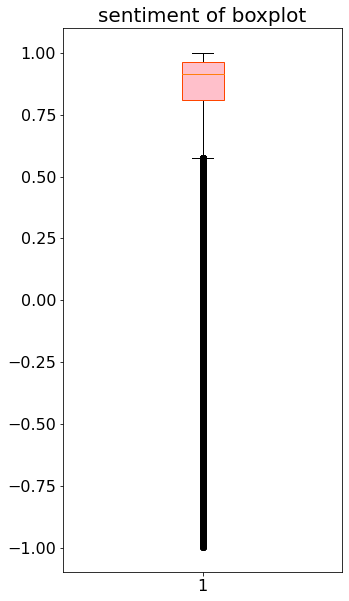

In [73]:
# box plots of reviews sentiment
box = df_concat['sentiment']

plt.figure(figsize=(5,10))#设置画布的尺寸
plt.title('sentiment of boxplot',fontsize=20)#标题，并设定字号大小

#boxprops：color箱体边框色，facecolor箱体填充色；
plt.boxplot([box],patch_artist = True, boxprops = {'color':'orangered','facecolor':'pink'})

plt.show()#显示图像


In [74]:
!pip install seaborn

<AxesSubplot:ylabel='sentiment'>

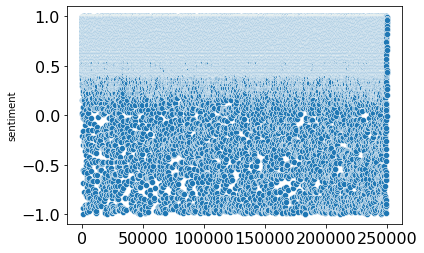

In [75]:
# neighbourhood_cleansed_data = df['neighbourhood_cleansed'].value_counts().head(10)
# neighbourhood_cleansed_data = neighbourhood_cleansed_data.sort_values()
# neighbourhood_cleansed_data.plot.barh(figsize=(15, 3), width=0.4)
# x=neighbourhood_cleansed_data.index
# y=neighbourhood_cleansed_data
# plt.show()
import seaborn as sns
sns.scatterplot(data=df_concat,x=df_concat['sentiment'].index,y=df_concat['sentiment'])

In [76]:
# 新增六个项目内容
# 合并完成内容在concat数据集当中
import pandas as pd
from matplotlib import pyplot as plt
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

from config import *

# 2. the most top 30 words in newreview data
# the reviews are mainly from the 'comment' column.

reviews_details = df_concat[['name', 'host_id', 'host_name', 'date', 'reviewer_id', 'reviewer_name', 'comments']]

host_reviews = reviews_details.groupby(['host_id', 'host_name']).size().sort_values(ascending=False).to_frame(name = "number_of_reviews")
# you can show something by the code below.
# host_reviews.head()
# reviews_details.comments.head()
# reviews_details.comments.values[1]

In [77]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kukudexinxin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

<ipython-input-78-cfcc23f909b6>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  reviews_details['comments'] = reviews_details['comments'].str.replace('\d+', '')
<ipython-input-78-cfcc23f909b6>:14: FutureWarning: The default value of regex will change from True to False in a future version.
  reviews_details['comments'] = reviews_details['comments'].str.replace('[^\w\s]'," ")
<ipython-input-78-cfcc23f909b6>:16: FutureWarning: The default value of regex will change from True to False in a future version.
  reviews_details['comments'] = reviews_details['comments'].str.replace('\s+', ' ')


friendly generous host 


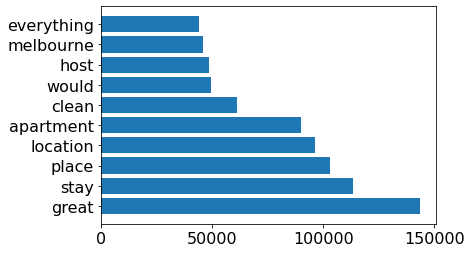

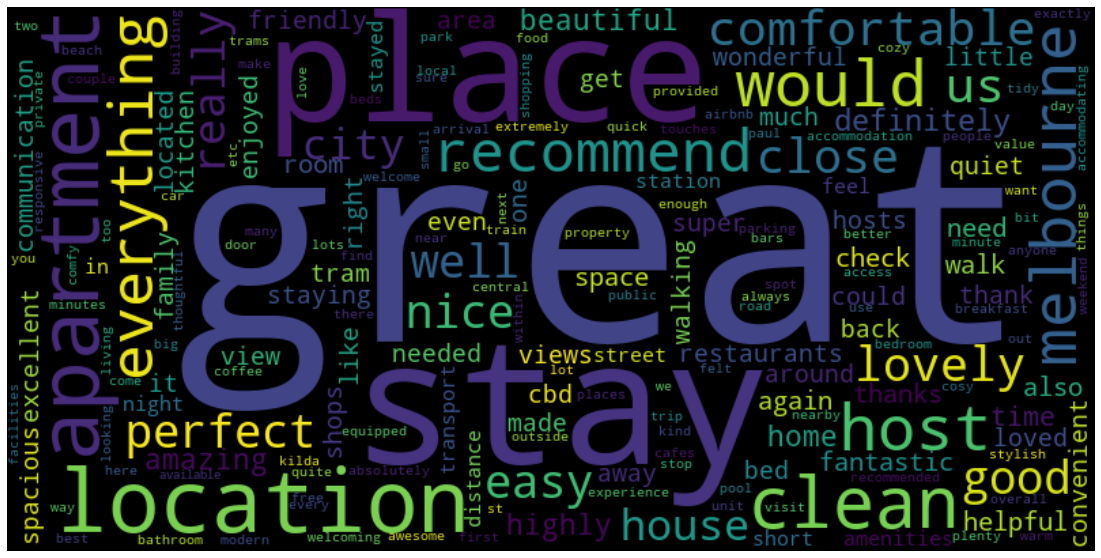

In [78]:
# and the basic pre processing code for comment. take out empty comments. 并对评论的各种格式进行修改，其中存在很多无意义的连接和我们并不希望进行统计的内容
reviews_details = reviews_details[reviews_details['comments'].notnull()]
#remove numbers
reviews_details['comments'] = reviews_details['comments'].str.replace('\d+', '')
#all to lowercase
reviews_details['comments'] = reviews_details['comments'].str.lower()
#remove windows new line
reviews_details['comments'] = reviews_details['comments'].str.replace('\r\n', "")
#remove stopwords (from nltk library)
stop_english = stopwords.words("english")
reviews_details['comments'] = reviews_details['comments'].apply(lambda x: " ".join([i for i in x.split()
                                                      if i not in (stop_english)]))
# remove punctuation
reviews_details['comments'] = reviews_details['comments'].str.replace('[^\w\s]'," ")
# replace x spaces by one space
reviews_details['comments'] = reviews_details['comments'].str.replace('\s+', ' ')

print(reviews_details.comments.values[2])

# find the most used words using the CountVectorizer() function of sklearn.
texts = reviews_details.comments.tolist()

vec = CountVectorizer().fit(texts)
bag_of_words = vec.transform(texts)
sum_words = bag_of_words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]

cvec_df = pd.DataFrame.from_records(words_freq, columns= ['words', 'counts']).sort_values(by="counts", ascending=False)
# 柱状图展示
# cvec_df.head(10).plot.barh(figsize=(15, 3), width=0.4)
plt.barh(cvec_df.head(10).words.to_list(),
         cvec_df.head(10).counts.to_list()
         )
plt.show()

# 词云展示
cvec_dict = dict(zip(cvec_df.words, cvec_df.counts))

wordcloud = WordCloud(width=800, height=400)
wordcloud.generate_from_frequencies(frequencies=cvec_dict)
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()



In [ ]:
# 3. Perimeter of number of listings per host.
# 我们需要找到最终入围的host有哪几个人？这个可以说是爱彼迎的优质会员了
df = df_concat
df = reduce_mem_usage(df)

# host_names = df[['host_name']].drop_duplicates()
# host_names = host_names.host_name.str.lower().tolist()
# print(len(host_names))

# 你需要什么内容这里选择一下就能显示了
# col_describe = ["host_is_superhost","host_listings_count","accommodates","bedrooms","beds"]# 太多了，需要自己选
# df.groupby(by="host_name")[col_describe].sum().describe()
#df.groupby(by="host_name").sum().describe()
df.groupby(by="host_name")["host_listings_count"].sum().describe()

In [ ]:
# 4. 计算从1-12⽉每个⽉的不同roomtype的数量（按照⽉份来计算）
# 从new review的⽂档⾥⾯，列出 id， room type，date 先将data⾥⾯拆分为year month day计算/拿出month另起⼀列计算
df4 = df[["id","room_type","date"]]
df4['date']=pd.to_datetime(df4['date'],format='%Y-%m-%d')
df4["data_year"]=df4.date.dt.year
df4["data_month"]=df4.date.dt.month
df4["data_day"]=df4.date.dt.day
df_grouped = df4.groupby(by="data_month")["room_type"].value_counts()
# Unstack the data to get it into a format that can be plotted
df_unstacked = df_grouped.unstack()


## Create a figure and a 3D axis
fig = plt.figure()
ax = plt.axes(projection='3d')
for line in df_unstacked.columns:
    # Plot the data set as a 2D line chart
    ax.plot(df_unstacked.index, df_unstacked[line])
# ax.plot(df_unstacked.index, df_unstacked["Entire home/apt"])
# ax.plot(df_unstacked.index, df_unstacked["Private room"])
# ax.plot(df_unstacked.index, df_unstacked["Shared room"])
# ax.plot(df_unstacked.index, df_unstacked["Hotel room"])
# Show the plot
plt.show()


# Create a figure and a 2D axis
#fig = plt.figure()
#ax = plt.axes()
#ax.plot(df_unstacked.index, df_unstacked["Entire home/apt"])
# ax.plot(df_unstacked.index, df_unstacked["Private room"])
# ax.plot(df_unstacked.index, df_unstacked["Shared room"])
# ax.plot(df_unstacked.index, df_unstacked["Hotel room"])
# Show the plot
# plt.show()


In [ ]:
# 5.Show计算不同⽉份的price情况
# 从new review的⽂档⾥⾯，列出 id，price，date\
df5 = df[["id","price_$","date"]]
df5['date']=pd.to_datetime(df5['date'],format='%Y-%m-%d')
df5["data_year"]=df5.date.dt.year
df5["data_month"]=df5.date.dt.month
df5["data_day"]=df5.date.dt.day

df5['price_$']=df5['price_$'].astype("float64")
df_grouped2 = df5.groupby(by="data_month")["price_$"].sum()
df_grouped2.plot.barh()
plt.show()

In [ ]:
print(df_grouped2)

In [ ]:
# 6.room type和price 直接的关系，横坐标是month
df6=df[["id","room_type","price_$","date"]]
df6['date']=pd.to_datetime(df6['date'],format='%Y-%m-%d')
df6["data_year"]=df6.date.dt.year
df6["data_month"]=df6.date.dt.month
df6["data_day"]=df6.date.dt.day
df6['price_$']=df6['price_$'].astype("float64")
df_grouped3 = df6.groupby(["data_month", "room_type"])['price_$'].mean()
# for analysis
# df_grouped3 = df6.groupby(["data_month", "room_type"])
# aggregated = df_grouped3.agg({'price_$': ['mean', 'max']})

# this could be the output.
df_unstacked = df_grouped3.unstack()


# -*- coding: utf-8 -*- 
# @Time : 2022/12/19 19:15 
# @Author : YeMeng 
# @File : vis3.py 
# @contact: 876720687@qq.com
# TODO:没有用


# import matplotlib.pyplot as plt
# import numpy as np
# # Fixing random state for reproducibility
# np.random.seed(19680801)
# fig = plt.figure()
# ax = fig.add_subplot(projection='3d')
# # 输入x y 值
# x, y = np.random.rand(2, 5)
# # 对应2d z值
# hist, xedges, yedges = np.histogram2d(x, y, bins=4, range=[[0, 2], [0, 2]])
# # Construct arrays for the anchor positions of the 16 bars.
# xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
# xpos = xpos.ravel()
# ypos = ypos.ravel()
# zpos = 0
# # Construct arrays with the dimensions for the 16 bars.
# dx = dy = 0.5 * np.ones_like(zpos)
# dz = hist.ravel()
# ax.bar3d(xpos, ypos, zpos, dx, dy, dz)
# plt.show()


import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
colors = ['r', 'g', 'b', 'y']
yticks = [3, 2, 1, 0]
for c, k in zip(colors, yticks):
    # Generate the random data for the y=k 'layer'.
    xs = np.arange(20)
    ys = np.random.rand(20)
    # You can provide either a single color or an array with the same length as
    # xs and ys. To demonstrate this, we color the first bar of each set cyan.
    cs = [c] * len(xs)
    # Plot the bar graph given by xs and ys on the plane y=k with 80% opacity.
    ax.bar(xs, ys, zs=k, zdir='y', color=cs, alpha=0.8)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
# On the y-axis let's only label the discrete values that we have data for.
ax.set_yticks(yticks)
plt.show()



# 3d
# df_unstacked = df_grouped3.unstack()
# x = df_unstacked.index.to_list()
# y = df_unstacked.columns.to_list()
# zpos=0
# dz = df_unstacked.values.ravel()
# # Create a figure and an axis
# fig = plt.figure()
# ax = fig.add_subplot(projection='3d')
# # Use ax.bar3d to create a 3D bar chart
# ax.bar3d(x=np.arange(len(x)),
#          y=np.arange(len(y)),
#          z=zpos,
#          dx=0.5,
#          dy=0.5,
#          dz=dz)
# # Set the x- and y-axis labels
# ax.set_xticks(np.arange(len(x)))
# ax.set_yticks(np.arange(len(y)))
# ax.set_xticklabels(x)
# ax.set_yticklabels(y)
# # Show the plot
# plt.show()

In [ ]:
print(df_unstacked)

In [ ]:
# -*- coding: utf-8 -*- 
# @Time : 2022/12/19 10:17 
# @Author : YeMeng 
# @File : vis2.py 
# @contact: 876720687@qq.com
# 新增六个项目内容
# 合并完成内容在concat数据集当中
import pandas as pd
from matplotlib import pyplot as plt
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

from config import *

# 2. the most top 30 words in newreview data
# the reviews are mainly from the 'comment' column.

reviews_details = df_concat[['name', 'host_id', 'host_name', 'date', 'reviewer_id', 'reviewer_name', 'comments']]

host_reviews = reviews_details.groupby(['host_id', 'host_name']).size().sort_values(ascending=False).to_frame(name = "number_of_reviews")
# you can show something by the code below.
# host_reviews.head()
# reviews_details.comments.head()
# reviews_details.comments.values[1]

# and the basic pre processing code for comment. take out empty comments. 并对评论的各种格式进行修改，其中存在很多无意义的连接和我们并不希望进行统计的内容
reviews_details = reviews_details[reviews_details['comments'].notnull()]
#remove numbers
reviews_details['comments'] = reviews_details['comments'].str.replace('\d+', '')
#all to lowercase
reviews_details['comments'] = reviews_details['comments'].str.lower()
#remove windows new line
reviews_details['comments'] = reviews_details['comments'].str.replace('\r\n', "")
#remove stopwords (from nltk library)
stop_english = stopwords.words("english")
reviews_details['comments'] = reviews_details['comments'].apply(lambda x: " ".join([i for i in x.split()
                                                      if i not in (stop_english)]))
# remove punctuation
reviews_details['comments'] = reviews_details['comments'].str.replace('[^\w\s]'," ")
# replace x spaces by one space
reviews_details['comments'] = reviews_details['comments'].str.replace('\s+', ' ')

print(reviews_details.comments.values[2])

# find the most used words using the CountVectorizer() function of sklearn.
texts = reviews_details.comments.tolist()

vec = CountVectorizer().fit(texts)
bag_of_words = vec.transform(texts)
sum_words = bag_of_words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]

cvec_df = pd.DataFrame.from_records(words_freq, columns= ['words', 'counts']).sort_values(by="counts", ascending=False)
# 柱状图展示
# cvec_df.head(10).plot.barh(figsize=(15, 3), width=0.4)
plt.barh(cvec_df.head(10).words.to_list(),
         cvec_df.head(10).counts.to_list()
         )
plt.show()

# 词云展示
cvec_dict = dict(zip(cvec_df.words, cvec_df.counts))

wordcloud = WordCloud(width=800, height=400)
wordcloud.generate_from_frequencies(frequencies=cvec_dict)
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()



# 3. Perimeter of number of listings per host.
# 我们需要找到最终入围的host有哪几个人？这个可以说是爱彼迎的优质会员了
df = pd.read_csv(data_out+"df_concat.csv")
df = reduce_mem_usage(df)

# host_names = df[['host_name']].drop_duplicates()
# host_names = host_names.host_name.str.lower().tolist()
# print(len(host_names))

# 你需要什么内容这里选择一下就能显示了
# col_describe = ["host_is_superhost","host_listings_count","accommodates","bedrooms","beds"]# 太多了，需要自己选
# df.groupby(by="host_name")[col_describe].sum().describe()
df.groupby(by="host_name").sum().describe()




# 4. 计算从1-12⽉每个⽉的不同roomtype的数量（按照⽉份来计算）
# 从new review的⽂档⾥⾯，列出 id， room type，date 先将data⾥⾯拆分为year month day计算/拿出month另起⼀列计算
df4 = df[["id","room_type","","date"]]
df4['date']=pd.to_datetime(df4['date'],format='%Y-%m-%d')
df4["data_year"]=df4.date.dt.year
df4["data_month"]=df4.date.dt.month
df4["data_day"]=df4.date.dt.day
df_grouped = df4.groupby(by="data_month")["room_type"].value_counts()
# Unstack the data to get it into a format that can be plotted
df_unstacked = df_grouped.unstack()


## Create a figure and a 3D axis
# fig = plt.figure()
# ax = plt.axes(projection='3d')
# for line in df_unstacked.columns:
#     # Plot the data set as a 2D line chart
#     ax.plot(df_unstacked.index, df_unstacked[line])
# # ax.plot(df_unstacked.index, df_unstacked["Entire home/apt"])
# # ax.plot(df_unstacked.index, df_unstacked["Private room"])
# # ax.plot(df_unstacked.index, df_unstacked["Shared room"])
# # ax.plot(df_unstacked.index, df_unstacked["Hotel room"])
# # Show the plot
# plt.show()


# Create a figure and a 2D axis
fig = plt.figure()
ax = plt.axes()
# ax.plot(df_unstacked.index, df_unstacked["Entire home/apt"])
# ax.plot(df_unstacked.index, df_unstacked["Private room"])
ax.plot(df_unstacked.index, df_unstacked["Shared room"])
ax.plot(df_unstacked.index, df_unstacked["Hotel room"])
# Show the plot
plt.show()


# 5.Show计算不同⽉份的price情况
# 从new review的⽂档⾥⾯，列出 id，price，date\
df5 = df[["id","price_$","date"]]
df5['date']=pd.to_datetime(df5['date'],format='%Y-%m-%d')
df5["data_year"]=df5.date.dt.year
df5["data_month"]=df5.date.dt.month
df5["data_day"]=df5.date.dt.day

df5['price_$']=df5['price_$'].astype("float64")
df_grouped2 = df5.groupby(by="data_month")["price_$"].sum()
df_grouped2.plot.barh()
plt.show()


# 6.room type和price 直接的关系，横坐标是month
df6=df[["id","room_type","price_$","date"]]
df6['date']=pd.to_datetime(df6['date'],format='%Y-%m-%d')
df6["data_year"]=df6.date.dt.year
df6["data_month"]=df6.date.dt.month
df6["data_day"]=df6.date.dt.day
df6['price_$']=df6['price_$'].astype("float64")
df_grouped3 = df6.groupby(["data_month", "room_type"])['price_$'].mean()
# for analysis
# df_grouped3 = df6.groupby(["data_month", "room_type"])
# aggregated = df_grouped3.agg({'price_$': ['mean', 'max']})

# this could be the output.
df_unstacked = df_grouped3.unstack()
 81  
vis3.py
Viewed
@@ -0,0 +1,81 @@
# -*- coding: utf-8 -*- 
# @Time : 2022/12/19 19:15 
# @Author : YeMeng 
# @File : vis3.py 
# @contact: 876720687@qq.com
# TODO:没有用


# import matplotlib.pyplot as plt
# import numpy as np
# # Fixing random state for reproducibility
# np.random.seed(19680801)
# fig = plt.figure()
# ax = fig.add_subplot(projection='3d')
# # 输入x y 值
# x, y = np.random.rand(2, 5)
# # 对应2d z值
# hist, xedges, yedges = np.histogram2d(x, y, bins=4, range=[[0, 2], [0, 2]])
# # Construct arrays for the anchor positions of the 16 bars.
# xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
# xpos = xpos.ravel()
# ypos = ypos.ravel()
# zpos = 0
# # Construct arrays with the dimensions for the 16 bars.
# dx = dy = 0.5 * np.ones_like(zpos)
# dz = hist.ravel()
# ax.bar3d(xpos, ypos, zpos, dx, dy, dz)
# plt.show()


import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
colors = ['r', 'g', 'b', 'y']
yticks = [3, 2, 1, 0]
for c, k in zip(colors, yticks):
    # Generate the random data for the y=k 'layer'.
    xs = np.arange(20)
    ys = np.random.rand(20)
    # You can provide either a single color or an array with the same length as
    # xs and ys. To demonstrate this, we color the first bar of each set cyan.
    cs = [c] * len(xs)
    # Plot the bar graph given by xs and ys on the plane y=k with 80% opacity.
    ax.bar(xs, ys, zs=k, zdir='y', color=cs, alpha=0.8)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
# On the y-axis let's only label the discrete values that we have data for.
ax.set_yticks(yticks)
plt.show()



# 3d
# df_unstacked = df_grouped3.unstack()
# x = df_unstacked.index.to_list()
# y = df_unstacked.columns.to_list()
# zpos=0
# dz = df_unstacked.values.ravel()
# # Create a figure and an axis
# fig = plt.figure()
# ax = fig.add_subplot(projection='3d')
# # Use ax.bar3d to create a 3D bar chart
# ax.bar3d(x=np.arange(len(x)),
#          y=np.arange(len(y)),
#          z=zpos,
#          dx=0.5,
#          dy=0.5,
#          dz=dz)
# # Set the x- and y-axis labels
# ax.set_xticks(np.arange(len(x)))
# ax.set_yticks(np.arange(len(y)))
# ax.set_xticklabels(x)
# ax.set_yticklabels(y)
# # Show the plot
# plt.show()

In [ ]:
# 运行更多行的代码
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_columns', 100)

import numpy as np

# reduce volumn of dataset stored in RAM/memory
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.
    """
    start_mem = df.memory_usage().sum() / 1024 ** 2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024 ** 2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    return df

In [ ]:
!pip install histogram -i https://pypi.tuna.tsinghua.edu.cn/simple/

In [ ]:
!pip install plotly

In [ ]:
# Statistics
import pandas as pd
import numpy as np
import math as mt

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

In [ ]:
fig = px.histogram(df.dropna(subset=['room_type'], axis=0), 
                   x='price', 
                   histnorm='percent',
                   color='room_type',
                   title='Histogram of price vs. room_type')
fig.show()

In [ ]:
df.head()

In [ ]:
#px.set_mapbox_access_token(open(".mapbox_galaxy").read())
px.set_mapbox_access_token('pk.eyJ1IjoiemFja3NhbWJlciIsImEiOiJjazc3MXI1NjQwMXIzM25vMnBtMWtpNWFjIn0.FHxYZnEoStWmap8EQe2l-g')
fig = px.scatter_mapbox(df[df.dtype], 
                        lat='latitude', 
                        lon='longitude',
                        color='neighbourhood_cleansed', 
                        size='price', 
                        color_continuous_scale=px.colors.cyclical.IceFire, 
                        hover_name='id',
                        hover_data=['property_type', 'room_type'],
                        size_max=15, 
                        zoom=10,
                        title='Map of price group by neighbourhood_cleansed')
fig.show()